Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Number of predicted survivors: 314
Number of predicted non-survivors: 577


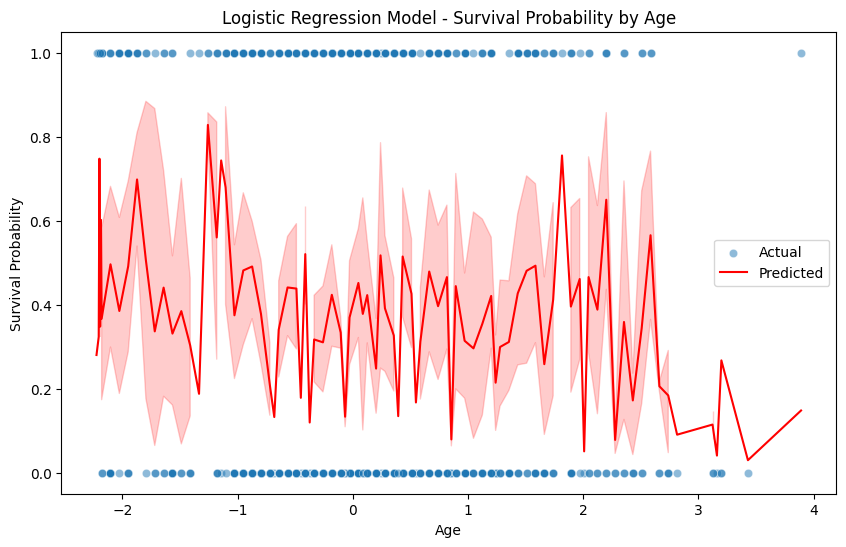

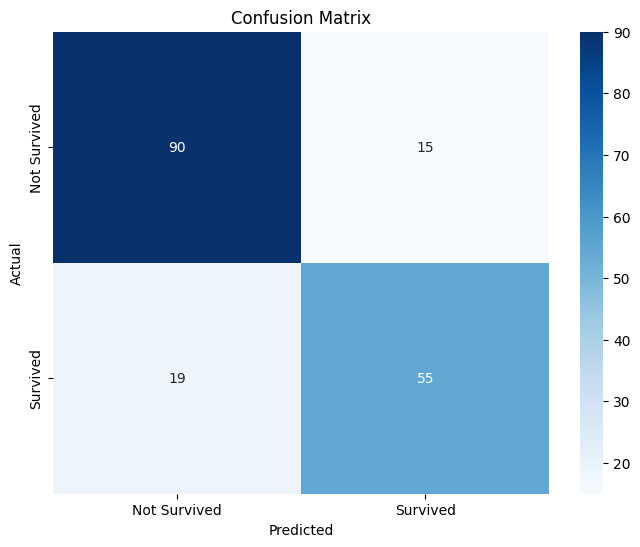

In [3]:
# Titanic Survival Prediction Notebook

# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Read the dataset
file_path = 'titanic.csv'  # Replace with your file path
titanic_data = pd.read_csv(file_path)

# Step 3: Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)  # Fill missing ages with the median age
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)  # Fill missing embarked with the mode
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)  # Fill missing fare with the median fare

# Drop the 'Cabin' column due to too many missing values
titanic_data.drop(columns=['Cabin'], inplace=True)

# Step 4: Encode categorical variables
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])  # Encode 'Sex'
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])  # Encode 'Embarked'

# Step 5: Features and target variable
X = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = titanic_data['Survived']

# Scale numerical features
scaler = StandardScaler()
X[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(X[['Age', 'Fare', 'SibSp', 'Parch']])

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Step 10: Predict the survival status for the entire dataset
y_pred_all = model.predict(X)

# Step 11: Count the number of predicted survivors and non-survivors
num_survivors = sum(y_pred_all)
num_non_survivors = len(y_pred_all) - num_survivors

print("Number of predicted survivors:", num_survivors)
print("Number of predicted non-survivors:", num_non_survivors)

# Visualizing the Logistic Regression Model's fit

# Predict probabilities
X['Survived_Prob'] = model.predict_proba(X)[:, 1]

# Plot predicted probabilities against Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Age'], y=y, label='Actual', alpha=0.5)
sns.lineplot(x=X['Age'], y=X['Survived_Prob'], color='red', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.title('Logistic Regression Model - Survival Probability by Age')
plt.legend()
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
